In [3]:
# 🛠️ Setup and Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import os
from tqdm import tqdm

Loaded dataset with 1200 reviews.
 Loading DistilBERT sentiment analysis model...


Device set to use cpu


Applying sentiment analysis to reviews...


100%|███████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:54<00:00, 21.91it/s]


Sentiment-annotated data saved to ../data/reviews_with_sentiment.csv


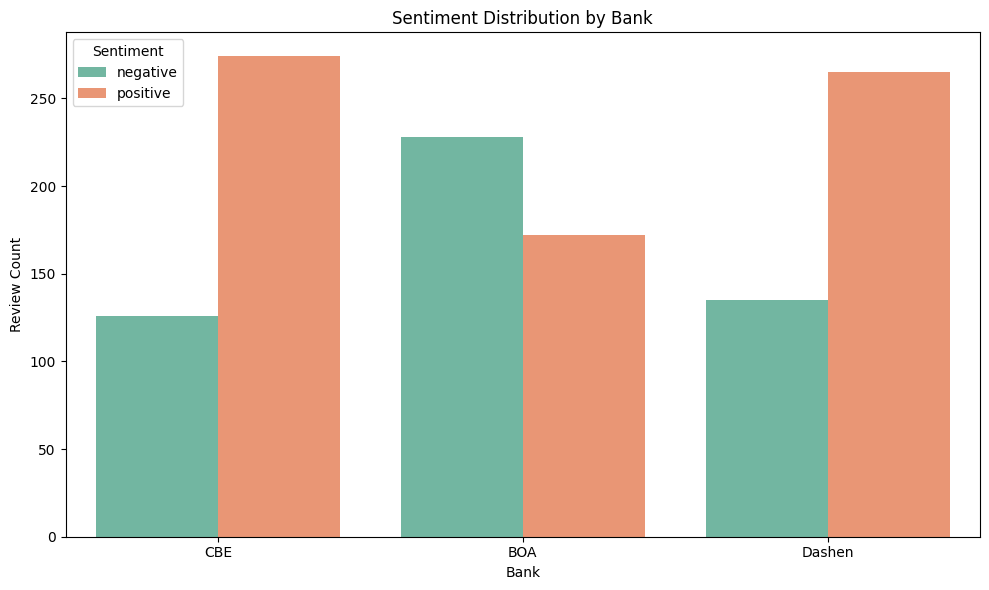

In [10]:
def apply_sentiment_analysis(df):
    """
    Applies DistilBERT sentiment analysis to the 'review' column.
    Adds 'sentiment_raw' and 'sentiment' columns.
    """
    print(" Loading DistilBERT sentiment analysis model...")
    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
    
    tqdm.pandas()
    #df = pd.read_csv("../data/raw_reviews.csv") 
    print("Applying sentiment analysis to reviews...")
    df['sentiment_raw'] = df['review'].progress_apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])

    df['sentiment'] = df['sentiment_raw'].map({
        'POSITIVE': 'positive',
        'NEGATIVE': 'negative'
    })
    df['sentiment'] = df['sentiment'].fillna('neutral')

    return df

def plot_sentiment_distribution(df):
    """
    Plots the sentiment distribution grouped by bank.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='bank', hue='sentiment', palette='Set2')
    plt.title('Sentiment Distribution by Bank')
    plt.xlabel('Bank')
    plt.ylabel('Review Count')
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.savefig("../data/sentiment_distribution_by_bank.png")
    plt.show()

def main():
    # Load cleaned review data
    try:
        df = pd.read_csv("../data/raw_reviews.csv")
        print(f"Loaded dataset with {len(df)} reviews.")
    except FileNotFoundError:
        print("File not found. Ensure 'data/raw_reviews.csv' exists.")
        return

    # Apply sentiment analysis
    df = apply_sentiment_analysis(df)

    # Save updated data
    output_path = "../data/reviews_with_sentiment.csv"
    df.to_csv(output_path, index=False)
    print(f"Sentiment-annotated data saved to {output_path}")

    # Plot sentiment distribution
    plot_sentiment_distribution(df)

if __name__ == "__main__":
    main()
